## Set up model

Set up a Pytorch model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000).


Plot the loss and error rate as a function of training epochs.


###  1.  Assessment of initial model:    ***12 marks***

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate).

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Subset, random_split
import matplotlib.pyplot as plt

In [22]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.0,), (1.0,))
])

# Load full MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_trainset_small =  [ train_dataset[i] for i in range(0,2000) ]

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_testset_small =[mnist_testset[i] for i in range(0,1000) ]


trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=4, shuffle=True)
print(len(trainloader.dataset))

2000


In [ ]:
# our simplest neural net - it is just going to be a linear layer and then softmax
class NN1( nn.Module ):
    
    def __init__(self): 
        super(NN1, self).__init__()
        self.layers = nn.Sequential( 
            nn.Flatten(), 
            nn.Linear(784,10))  # a linear layer (a matrix, plus biases) with 784 inputs and 10 outputs
             # if we are going to make probabilistic categorical predictions, it is more flexible to allow unnormalised 
             # outputs, because we can use  different functions for the predictions and and in calculating the loss, as 
             # we shall soon see
    
    
    def forward(self,x): # computes the forward pass ... this one is particularly simple
        x = self.layers(x)
        return x
    
nn1 = NN1()

In [ ]:

loss_Funciton = nn.CrossEntropyLoss()

optimizer = optim.Adam(nn1.parameters(), lr=0.001)

In [9]:
num_epochs = 200
train_losses, val_losses = [], []
train_errors, val_errors = [], []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_losses.append(train_loss / len(train_loader))
    train_errors.append(1 - correct_train / total_train)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    val_losses.append(val_loss / len(val_loader))
    val_errors.append(1 - correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Error: {train_errors[-1]:.4f}, Val Error: {val_errors[-1]:.4f}")

Epoch 1/200, Train Loss: 0.2082, Val Loss: 0.1099, Train Error: 0.0413, Val Error: 0.0288
Epoch 2/200, Train Loss: 0.0733, Val Loss: 0.0959, Train Error: 0.0212, Val Error: 0.0275
Epoch 3/200, Train Loss: 0.0516, Val Loss: 0.0859, Train Error: 0.0144, Val Error: 0.0250
Epoch 4/200, Train Loss: 0.0302, Val Loss: 0.0796, Train Error: 0.0088, Val Error: 0.0238
Epoch 5/200, Train Loss: 0.0177, Val Loss: 0.0981, Train Error: 0.0041, Val Error: 0.0238
Epoch 6/200, Train Loss: 0.0132, Val Loss: 0.0883, Train Error: 0.0019, Val Error: 0.0225
Epoch 7/200, Train Loss: 0.0116, Val Loss: 0.1110, Train Error: 0.0038, Val Error: 0.0300
Epoch 8/200, Train Loss: 0.0076, Val Loss: 0.0870, Train Error: 0.0012, Val Error: 0.0238
Epoch 9/200, Train Loss: 0.0046, Val Loss: 0.0938, Train Error: 0.0003, Val Error: 0.0262
Epoch 10/200, Train Loss: 0.0024, Val Loss: 0.0902, Train Error: 0.0000, Val Error: 0.0275
Epoch 11/200, Train Loss: 0.0022, Val Loss: 0.0861, Train Error: 0.0000, Val Error: 0.0212
Epoch 12

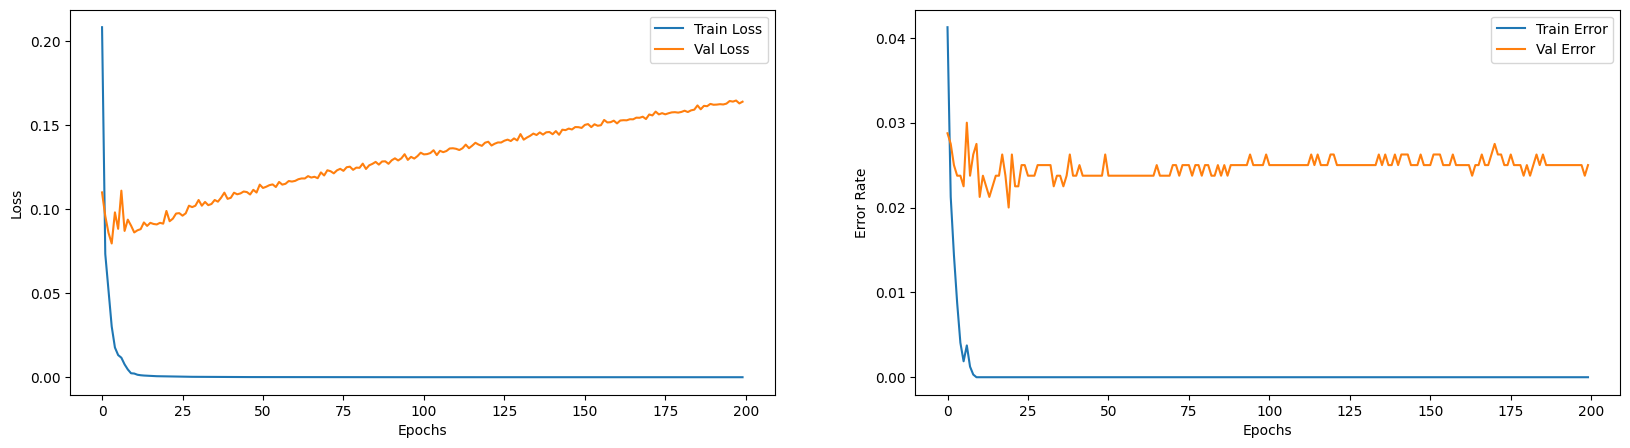

In [10]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_errors, label='Train Error')
plt.plot(val_errors, label='Val Error')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

Epoch 1/10, Train Loss: 0.3932, Val Loss: 0.2483
Epoch 2/10, Train Loss: 0.1867, Val Loss: 0.1762
Epoch 3/10, Train Loss: 0.1301, Val Loss: 0.1346
Epoch 4/10, Train Loss: 0.0952, Val Loss: 0.1160
Epoch 5/10, Train Loss: 0.0763, Val Loss: 0.1072
Epoch 6/10, Train Loss: 0.0608, Val Loss: 0.1037
Epoch 7/10, Train Loss: 0.0507, Val Loss: 0.0952
Epoch 8/10, Train Loss: 0.0403, Val Loss: 0.0944
Epoch 9/10, Train Loss: 0.0339, Val Loss: 0.0948
Epoch 10/10, Train Loss: 0.0280, Val Loss: 0.0947


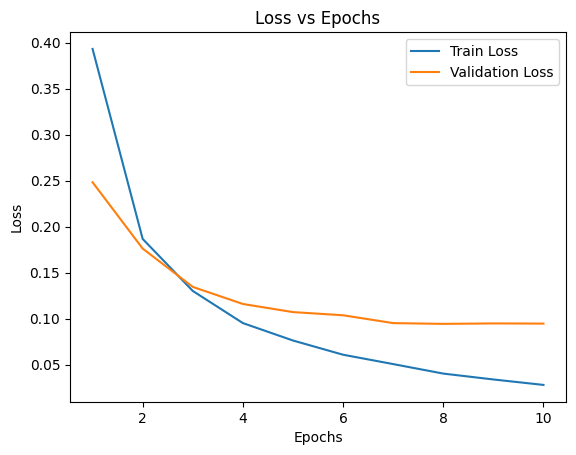

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt

# 1. Load and Transform Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.0], std=[1.0,])])
dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 2. Split into Training and Validation Sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # 20% for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 3. Create Data Loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# 4. Define a Simple Model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. Train the Model
num_epochs = 10
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validate the Model
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

# 6. Plot Loss
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()


Epoch 1/100 | Train Loss: 1.3749 | Train Error: 0.3838 | Val Loss: 0.8550 | Val Error: 0.2350
Epoch 2/100 | Train Loss: 0.5941 | Train Error: 0.1644 | Val Loss: 0.6880 | Val Error: 0.2125
Epoch 3/100 | Train Loss: 0.4377 | Train Error: 0.1144 | Val Loss: 0.5682 | Val Error: 0.1875
Epoch 4/100 | Train Loss: 0.3494 | Train Error: 0.0913 | Val Loss: 0.5481 | Val Error: 0.1600
Epoch 5/100 | Train Loss: 0.3090 | Train Error: 0.0875 | Val Loss: 0.5006 | Val Error: 0.1475
Epoch 6/100 | Train Loss: 0.2808 | Train Error: 0.0769 | Val Loss: 0.6041 | Val Error: 0.1925
Epoch 7/100 | Train Loss: 0.2614 | Train Error: 0.0675 | Val Loss: 0.5593 | Val Error: 0.1825
Epoch 8/100 | Train Loss: 0.2369 | Train Error: 0.0669 | Val Loss: 0.5252 | Val Error: 0.1600
Epoch 9/100 | Train Loss: 0.2206 | Train Error: 0.0637 | Val Loss: 0.4959 | Val Error: 0.1400
Epoch 10/100 | Train Loss: 0.1776 | Train Error: 0.0425 | Val Loss: 0.5931 | Val Error: 0.1675
Epoch 11/100 | Train Loss: 0.1670 | Train Error: 0.0406 | V

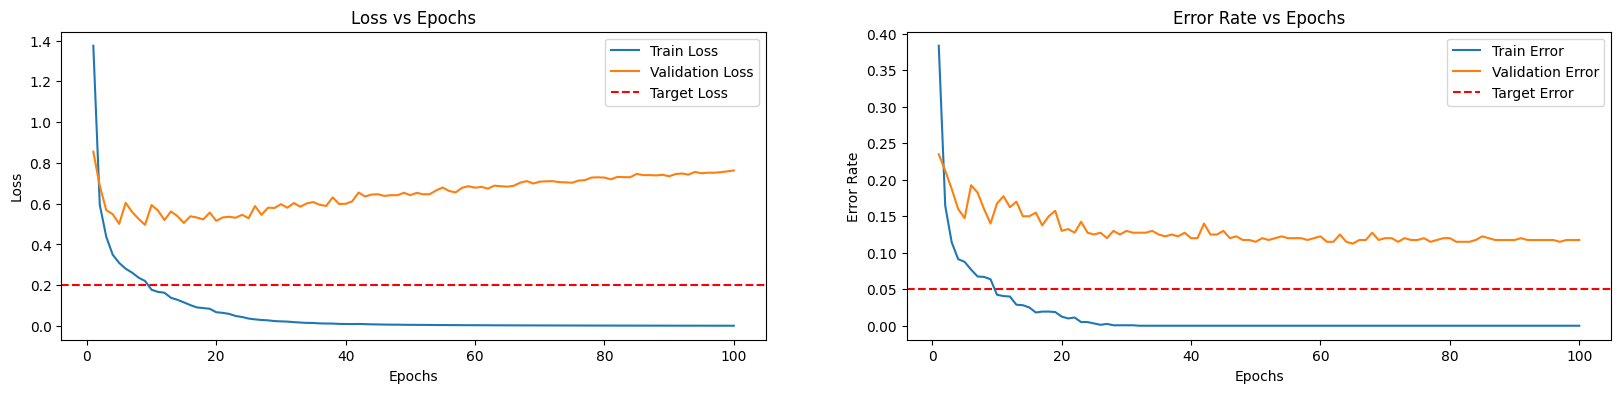

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt

# Define Target Loss and Error Rate (for overfitting demonstration)
TARGET_LOSS = 0.2
TARGET_ERROR_RATE = 0.05  # 5% error, meaning 95% accuracy

# Load and Transform Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
full_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Select only 2000 or 4000 samples
subset_size = 2000  # Change to 4000 if required
train_dataset, _ = random_split(full_dataset, [subset_size, len(full_dataset) - subset_size])

# Split into Training and Validation Sets (80-20 split)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Create Data Loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

# Define a Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # Increased neurons to overfit
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the Model
num_epochs = 100
train_losses, val_losses = [], []
train_errors, val_errors = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct_train, total_train = 0.0, 0, 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_error = 1 - (correct_train / total_train)  # Error rate
    train_errors.append(train_error)
    
    # Validate the Model
    model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_error = 1 - (correct_val / total_val)  # Error rate
    val_errors.append(val_error)
    
    print(f'Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Train Error: {train_error:.4f} | Val Loss: {avg_val_loss:.4f} | Val Error: {val_error:.4f}')

# Plot Loss
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.axhline(y=TARGET_LOSS, color='r', linestyle='--', label='Target Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

# Plot Error Rate
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_errors, label='Train Error')
plt.plot(range(1, num_epochs+1), val_errors, label='Validation Error')
plt.axhline(y=TARGET_ERROR_RATE, color='r', linestyle='--', label='Target Error')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Error Rate vs Epochs')

plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define optimizer with L2 regularization (weight decay)
weight_decay_values = [0, 1e-2, 1e-3, 1e-4, 1e-5]  # Experiment with more values
num_epochs = 30  # Reduce for faster experimentation
last_n_epochs = 5  # Number of epochs to average for best selection

results = {}
avg_val_losses = {}  # Store average validation losses

for wd in weight_decay_values:
    print(f"\nTraining with weight decay = {wd}")

    # Initialize model and optimizer
    model = SimpleCNN()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=wd)  # L2 regularization

    # Define loss function
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

    # Store results for plotting
    results[wd] = val_losses

    # Compute the average validation loss over the last `last_n_epochs` epochs
    avg_val_losses[wd] = np.mean(val_losses[-last_n_epochs:])

# Identify the best weight decay (min avg validation loss)
best_wd = min(avg_val_losses, key=avg_val_losses.get)
print(f"\nBest weight decay: {best_wd} with avg validation loss: {avg_val_losses[best_wd]:.4f}")

# Plot results
plt.figure(figsize=(10, 5))
for wd, val_loss in results.items():
    plt.plot(range(1, num_epochs + 1), val_loss, label=f"Weight Decay: {wd}")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Effect of L2 Regularization on Validation Loss")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn

# Define training set sizes
data_sizes = [500, 1000, 2000, 4000, 8000, 16000, 32000]
num_epochs = 200
weight_decay_values = [0, 1e-2, 1e-3, 1e-4, 1e-5]  # Experiment with different values

# Store results
validation_losses = {wd: [] for wd in weight_decay_values}

# Loop through different training set sizes
for dt in data_sizes:
    train_loader, val_loader = dataset(dt)  # Assume dataset() returns loaders
    
    # Get training and validation losses
    _, _, results = lossCalculation2(train_loader, val_loader, num_epochs)
    
    # Store the final validation loss for each weight decay value
    for wd in weight_decay_values:
        validation_losses[wd].append(results[wd][-1])  # Take the last epoch's loss

# Plot log-log graph
plt.figure(figsize=(10, 5))
for wd, val_loss in validation_losses.items():
    plt.loglog(data_sizes, val_loss, marker='o', label=f"Weight Decay: {wd}")

plt.xlabel("Training Set Size (log scale)")
plt.ylabel("Validation Loss (log scale)")
plt.title("Effect of L2 Regularization on Validation Loss")
plt.legend()
plt.show()


In [ ]:
# Validation
model.eval()
val_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        loss = loss_Funciton(outputs, labels)
        val_loss += loss.item()

        # Compute Error Rate
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Count correct predictions

val_losses.append(val_loss / len(val_loader))
val_error_rate = 1 - (correct / total)  # Error Rate = 1 - Accuracy


In [ ]:
# Store results
validation_errors = {wd: [] for wd in weight_decay_values}

# Loop through different training set sizes
for dt in data_sizes:
    train_loader, val_loader = dataset(dt)
    
    # Get training and validation errors
    _, _, results = lossCalculation2(train_loader, val_loader, num_epochs)

    # Store final validation error for each weight decay value
    for wd in weight_decay_values:
        validation_errors[wd].append(results[wd][-1])  # Use last epoch's error rate

# Plot log-log graph for validation error rate
plt.figure(figsize=(10, 5))
for wd, val_err in validation_errors.items():
    plt.loglog(data_sizes, val_err, marker='o', label=f"Weight Decay: {wd}")

plt.xlabel("Training Set Size (log scale)")
plt.ylabel("Validation Error Rate (log scale)")
plt.title("Effect of L2 Regularization on Validation Error Rate")
plt.legend()
plt.show()
